In [34]:
####################################################################
###    This is the PYTHON version of program 2.7 from page 44 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SICR which includes a carrier class.		           #
####################################################################

In [35]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*mu is the per capita death rate, and the population level birth rate.

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*epsilon is the proportion reduction in transmission from carriers compared to standard infectious individuals.

*q is the proportion of infected individuals that become carriers rather than fully recover.

*Gamma is the recovery rate associated with carriers; hence the reciprocal (1/Γ) is the average time an individual is in the carrier class.

*S0 is the initial proportion of the population that are susceptible.

*I0 is the initial proportion of the population that are infectious.

*C0 is the initial proportion of the population that are carriers.

In [36]:
beta=0.2
epsilon=0.1
gamma=0.01
Gamma=0.001
mu=1/(50*365.0)
q=0.4
S0=0.1
I0=1e-4
C0=1e-3
ND=10*365
TS=1.0
INPUT = (S0, I0, C0)

In [37]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = mu - beta * V[0] * (V[1] + epsilon * V[2]) - mu * V[0]
	Y[1] = beta * V[0] * (V[1] + epsilon * V[2]) - gamma * V[1] - mu * V[1]
	Y[2] = q * gamma * V[1] - Gamma * V[2] - mu * V[2]
	return Y   # For odeint

In [38]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

Rec=1. - (RES[:,0]+RES[:,1]+RES[:,2])
print(RES)

[[1.00000000e-01 1.00000000e-04 1.00000000e-03]
 [1.00045283e-01 1.03009779e-04 9.99351573e-04]
 [1.00090503e-01 1.06050215e-04 9.98715922e-04]
 ...
 [3.63145493e-02 5.23618744e-03 2.00877874e-02]
 [3.63147345e-02 5.23615827e-03 2.00875438e-02]
 [3.63149198e-02 5.23612927e-03 2.00873002e-02]]


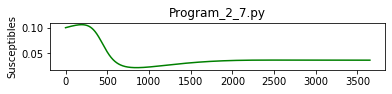

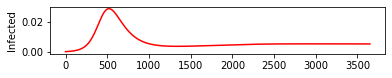

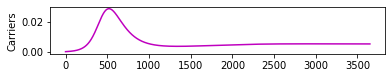

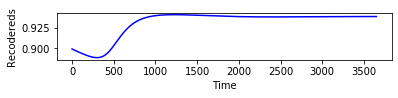

In [39]:
#Ploting
pl.subplot(411)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_7.py')
pl.ylabel('Susceptibles')
pl.show()

pl.subplot(412)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.ylabel('Infected')
pl.show()

pl.subplot(413)
pl.plot(RES[:,1], '-m', label='Carriers')
pl.ylabel('Carriers')
pl.show()

pl.subplot(414)
pl.plot(Rec, '-b', label='Recodereds')
pl.xlabel('Time')
pl.ylabel('Recodereds')
pl.show()